In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lab: Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework
Fork and clone this repo. At the end of this lab, you'll submit a pull request using the `Titanic.ipynb` notebook to answer the questions below.

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this project
3. Create an iPython notebook and load the csv into pandas.


In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

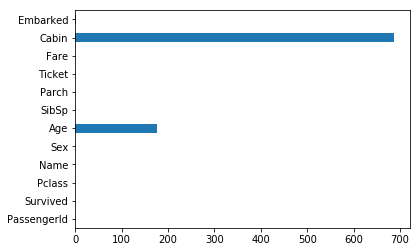

In [4]:
missing = df.isnull().sum()

missing.plot(kind='barh')

In [5]:
df.Cabin.isnull().sum()

687

The 'Cabin' column has the most NaN values. It has 687 empty cells.

In [6]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# drop identified rows from the dataframe
df.drop(df.index[[61, 829]], inplace=True)

In [8]:
df.Cabin = df.Cabin.astype(str)
df.Cabin = df.Cabin.map(lambda x:  x.replace('nan', '¯\(ツ)/¯'))

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [9]:
df['FamilyCount'] = df.SibSp + df.Parch
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1


In [10]:
df['IsReverand'] = df.Name.str.contains('Rev.').astype(int)

In [11]:
df['Embarked_C'] = df.Embarked.str.contains('C').astype(int)

In [12]:
df['Embarked_Q'] = df.Embarked.str.contains('Q').astype(int)

In [13]:
df['Embarked_S'] = df.Embarked.str.contains('S').astype(int)

In [14]:
df['Is_female'] = df.Sex.str.contains('female').astype(int)

In [15]:
df['Is_male_temp'] = df.Sex == 'male'
df['Is_male'] = df.Is_male_temp.astype(int)
df.Name.count() - df.Is_male.sum()

312

## Step 4: Exploratory analysis

1. What was the survival rate overall?

In [16]:
# print(f'{df.Survived.sum()} out of {df.Name.count()} passengers survived.')
# print('')
print(f'For passengers whose survival status was listed (we cannot tell survival status for family members), the survival rate overall was {100 * df.Survived.sum() / df.Name.count()} percent.')

For passengers whose survival status was listed (we cannot tell survival status for family members), the survival rate overall was 38.24521934758155 percent.


2. Which gender fared the worst? What was their survival rate?

In [17]:
# print(f'{np.sum((df.Is_female + df.Survived) == 2)} out of {df.Is_female.sum()} females survived.')
# print(f'{np.sum(df.Is_male + df.Survived == 2)} out of {df.Is_male.sum()} males survived.')
# print(f'Female survival rate: {100 * np.sum(df.Is_female + df.Survived == 2) / df.Is_female.sum()} percent.')
# print(f'Male survival rate: {100 * np.sum(df.Is_male + df.Survived == 2) / df.Is_male.sum()} percent.')
# print('')
print('The males fared worse than the females.')
print(f'Male survival rate: {100 * np.sum(df.Is_male + df.Survived == 2) / df.Is_male.sum()} percent')

The males fared worse than the females.
Male survival rate: 18.890814558058924 percent


3. What was the survival rate for each `Pclass`?

In [18]:
# print(f'{np.sum((df.Pclass == 1) + df.Survived == 2)} out of {np.sum(df.Pclass == 1)} with Pclass 1 survived')
# print(f'{np.sum((df.Pclass == 2) + df.Survived == 2)} out of {np.sum(df.Pclass == 2)} with Pclass 2 survived')
# print(f'{np.sum((df.Pclass == 3) + df.Survived == 2)} out of {np.sum(df.Pclass == 3)} with Pclass 3 survived')
# print('')
print(f'Pclass 1 survival rate: {100 * np.sum((df.Pclass == 1) + df.Survived == 2) / np.sum(df.Pclass == 1)} percent')
print(f'Pclass 2 survival rate: {100 * np.sum((df.Pclass == 2) + df.Survived == 2) / np.sum(df.Pclass == 2)} percent')
print(f'Pclass 3 survival rate: {100 * np.sum((df.Pclass == 3) + df.Survived == 2) / np.sum(df.Pclass == 3)} percent')

Pclass 1 survival rate: 62.61682242990654 percent
Pclass 2 survival rate: 47.28260869565217 percent
Pclass 3 survival rate: 24.236252545824847 percent


4. Did any reverends survive? How many?

In [19]:
# print (f'{np.sum(df.IsReverand + df.Survived == 2)} out of {df.IsReverand.sum()} reverands survived.')
# print('')
print('No reverands survived')

No reverands survived


5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [20]:
empty_cabin = df.Cabin == "¯\(ツ)/¯"
# print(f'{np.sum(empty_cabin + df.Survived == 2)} out of {empty_cabin.sum()} with cabin marked empty survived')
# print('')
print(f'Empty cabin survival rate: {100 * np.sum(empty_cabin + df.Survived == 2) / empty_cabin.sum()} percent')

Empty cabin survival rate: 29.985443959243085 percent


6. What is the survival rate for people whose `Age` is empty?

In [21]:
# print(f'{np.sum(df.Age.isnull() + df.Survived == 2)} out of {df.Age.isnull().sum()} with Age empty survived')
# print('')
print(f'Age empty survival rate: {100 * np.sum(df.Age.isnull() + df.Survived == 2) / df.Age.isnull().sum()} percent')

Age empty survival rate: 29.37853107344633 percent


7. What is the survival rate for each port of embarkation?

In [22]:
#print(f'{np.sum(df.Embarked_C + df.Survived == 2)} out of {df.Embarked_C.sum()} who embarked from C survived.')
print(f'Embarkation port C survival rate: {100* np.sum(df.Embarked_C + df.Survived == 2) / df.Embarked_C.sum()} percent')
#print('')
#print(f'{np.sum(df.Embarked_S + df.Survived == 2)} out of {df.Embarked_S.sum()} who embarked from S survived.')
print(f'Embarkation port S survival rate: {100* np.sum(df.Embarked_S + df.Survived == 2) / df.Embarked_S.sum()} percent')
#print('')
#print(f'{np.sum(df.Embarked_Q + df.Survived == 2)} out of {df.Embarked_Q.sum()} who embarked from C survived.')
print(f'Embarkation port Q survival rate: {100* np.sum(df.Embarked_Q + df.Survived == 2) / df.Embarked_Q.sum()} percent')

Embarkation port C survival rate: 55.357142857142854 percent
Embarkation port S survival rate: 33.69565217391305 percent
Embarkation port Q survival rate: 38.96103896103896 percent


8. What is the survival rate for children (under 12) in each `Pclass`?

In [23]:
print(f'Pclass 1 child survival rate: {100 * np.sum((df.Age < 12) & (df.Pclass == 1) & (df.Survived)) / np.sum((df.Age < 12) & (df.Pclass == 1))} percent')
print(f'Pclass 2 child survival rate: {100 * np.sum((df.Age < 12) & (df.Pclass == 2) & (df.Survived)) / np.sum((df.Age < 12) & (df.Pclass == 2))} percent')
print(f'Pclass 3 child survival rate: {100 * np.sum((df.Age < 12) & (df.Pclass == 3) & (df.Survived)) / np.sum((df.Age < 12) & (df.Pclass == 3))} percent')

Pclass 1 child survival rate: 75.0 percent
Pclass 2 child survival rate: 100.0 percent
Pclass 3 child survival rate: 40.42553191489362 percent


9. Did the captain of the ship survive? Is he on the list?


The captain did not survive (https://en.wikipedia.org/wiki/Edward_Smith_(sea_captain)). His name is not on the list.

10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [24]:
df[df.Survived == 0].sort_values('Fare', ascending=False)
print('Of all the people who died, the most expensive ticket is a tie between Mr. Charles Alexander Fortune and Mr. Mark Fortune. The ticket cost was 263.')

Of all the people who died, the most expesive ticket is a tie between Mr. Charles Alexander Fortune and Mr. Mark Fortune. The ticket cost was 263.


11. Does having family on the boat help or hurt your chances of survival?

In [25]:
#print(np.sum((df.FamilyCount == 0) & (df.Survived)) / np.sum(df.FamilyCount == 0))
#print(np.sum((df.FamilyCount > 0) & (df.Survived)) / np.sum(df.FamilyCount > 0))
print('Those with family on the boat had a higher survival rate (50.6%) than those who had no family on the boat (30.1%).')

Those with family on the boat had a higher survival rate (50.6%) than those who had no family on the boat (30.1%).


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [26]:
import seaborn as sns

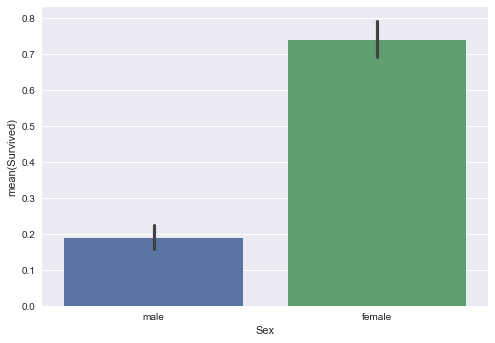

In [47]:
sns.barplot(x='Sex', y='Survived', data=df)

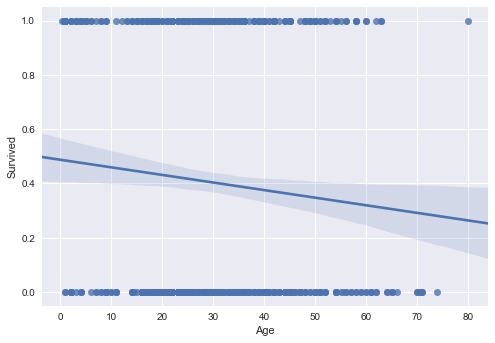

In [75]:
sns.regplot(df.Age, df.Survived, data=df)

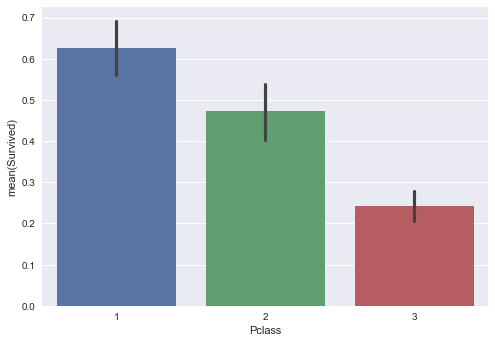

In [48]:
sns.barplot(x='Pclass', y='Survived', data=df)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/kevinc/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


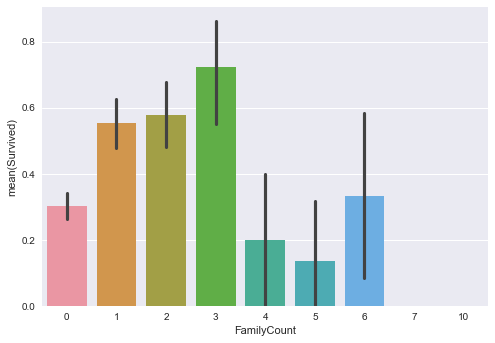

In [63]:
sns.barplot(x='FamilyCount', y='Survived', data=df)

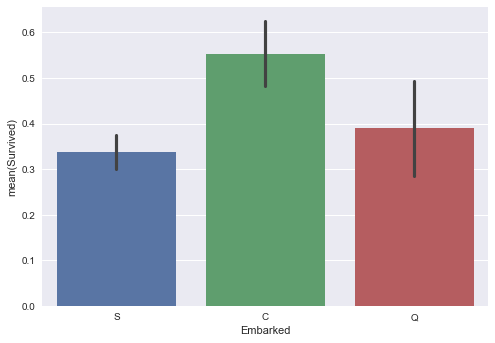

In [70]:
sns.barplot(x='Embarked', y='Survived', data=df)